# 1. State Problem

### 1.1 Problem and Pain point
ปัญหาการปฏิบัติการทดลองโลหิตวิทยา คือ แม้จะใช้เครื่องมือในการนับเม็ดเลือดแล้ว นักปฏิบัติการโลหิตวิทยาต้องตรวจสอบและนับจำนวนเม็ดเลือดด้วยสายตาอีกครั้ง ส่งผลให้เกิดภาระงานที่มากขึ้น ดังนั้น กลุ่มของเราจึงพัฒนาโครงการนี้ขึ้นมา โดยมีเป้าหมายเพื่อลดภาระงานของแพทย์ในการนับและจำแนกเม็ดเลือดขาว ด้วยการนำ AI และเทคโนโลยี deep learning มาช่วยในการนับและจำแนกเม็ดเลือดขาวโดยอัตโนมัติ
### 1.2 Related work
- https://www.researchgate.net/publication/350441174_Blood_cells_classification_using_convolutional_neural_network_architecture
    บทความ "Blood Cells Classification using Convolutional Neural Network (CNN) Architecture" (2020) ได้รับแรงบันดาลใจจากความซับซ้อนในการจำแนกเซลล์เม็ดเลือดขาวชนิดต่าง ๆ ผู้เขียนมีเป้าหมายที่จะสร้าง machine learning มาช่วยแก้ปัญหานี้ โดยการจำแนกประเภทของเซลล์เม็ดเลือดขาวสามารถช่วยในการวินิจฉัยโรคได้ ในการศึกษานี้ ผู้เขียนต้องการหาโมเดลที่แม่นยำที่สุดในการจำแนกเซลล์เม็ดเลือดขาว และผลลัพธ์ที่ได้คือโมเดล AlexNet มีค่า accuracy สูงสุดที่ 80% โดยใช้ข้อมูลเซลล์เม็ดเลือดขาว 5 ชนิด

- บทความที่เกี่ยวข้องมีจุดเด่นคือ การทดลองใช้โมเดลที่หลากหลายและการเปรียบเทียบประสิทธิภาพของแต่ละโมเดลอย่างเป็นระบบ ทำให้สามารถเห็นความแตกต่างในความแม่นยำและความเหมาะสมของแต่ละโมเดลในการจำแนกเซลล์เม็ดเลือดขาว อย่างไรก็ตาม ข้อเสียคือ โมเดลที่มีความแม่นยำสูงที่สุด ซึ่งคือ AlexNet มีค่า accuracy เพียง 80% ซึ่งถือว่าเป็นค่าที่ค่อนข้างปานกลาง และอาจไม่เพียงพอต่อการนำไปใช้ในงานวินิจฉัยทางการแพทย์ที่ต้องการความแม่นยำสูง

- Research Gap: แม้ว่าบทความ "Blood Cells Classification using Convolutional Neural Network (CNN) Architecture" จะมีการทดสอบโมเดลที่หลากหลายและชี้ให้เห็นถึงประสิทธิภาพของ AlexNet ในการจำแนกเซลล์เม็ดเลือดขาว แต่ค่า accuracy ที่ได้สูงสุดเพียง 80% นั้นยังค่อนข้างต่ำเมื่อเปรียบเทียบกับความต้องการในการนำไปใช้ในงานทางการแพทย์ ซึ่งต้องการความแม่นยำที่สูงกว่านี้ในการวินิจฉัยโรคที่ซับซ้อน Research Gap ของงานนี้จึงขึ้นอยู่กับ การปรับแต่งข้อมูล การปรับแต่งสถาปัตยกรรมอของ CNN หรือการใช้โมเดลอย่าง Tensoflow มาใช้ เพื่อเพิ่มประสิทธิภาพในการจำแนกเซลล์เม็ดเลือดขาว

### 1.3 Unique method
ทางกลุ่มของเราใช้หลักการของโครงข่ายประสาทเทียมแบบ convolutional neural network (CNN) ในการฝึกโมเดล โดยมีการทำ preprocessing เช่น การเพิ่มความหลากหลายของข้อมูล (data augmentation) เพื่อเพิ่มประสิทธิภาพในการจำแนก ชนิดของเซลล์เม็ดเลือดที่ใช้ในการฝึกโมเดลจะเพิ่มจาก 5 ชนิด เป็น 8 ชนิด ได้แก่ เซลล์โมโนไซต์ (monocyte), เซลล์นิวโทรฟิล (neutrophil), เซลล์เบโซฟิล (basophil), เซลล์ลิมโฟไซท์ (lymphocyte), เซลล์อีโอซิโนฟิล (eosinophil), เซลล์อีริย์โธรบลาสต์ (erythroblasts), เซลล์ immature granulocyte (IG) และเกล็ดเลือด (platelets)

# 2. Data Preparation

### 2.1 Data source
- แหล่งข้อมูลที่กลุ่มของเราใช้ในการฝึกโมเดลมาจากเว็บไซต์ Kaggle ซึ่งเป็นแพลตฟอร์มที่ให้บริการ dataset หลากหลายรูปแบบ โดยสามารถดาวน์โหลดข้อมูลไปใช้งานได้โดยไม่ต้องเสียค่าใช้จ่าย เหตุผลที่เลือกใช้ข้อมูลชุดนี้คือ เป็นข้อมูลรูปภาพของเซลล์เม็ดเลือดที่มีจำนวนมากที่สุดที่สามารถหาได้ จำนวน 17092 รูป และมีการจำแนกประเภทของเซลล์เม็ดเลือดออกเป็น 8 ประเภทเรียบร้อยแล้ว ซึ่งช่วยให้สะดวกต่อการนำไปใช้ฝึกโมเดล
- https://www.kaggle.com/datasets/unclesamulus/blood-cells-image-dataset raw dataset จากเว็บไซต์ kaggle
- https://drive.google.com/drive/folders/10eyJBTHMSuIA43fhmXeVB2AemOS_WsIW?usp=sharing cleaned data และตัวโมเดลที่เทรนแล้ว upload อยู่ใน google drive นี้ และ code ของเว็บการ implementation อยู่ในนี้ด้วย
### 2.2 Data Cleaning
- จากข้อมูลที่ได้ download มา พบว่าข้อมูลภาพเซลล์แต่ละประเภทนั้นมีภาพเซลล์ที่แตกแล้ว ซึ่งไม่สามารถนำไปใช้ประโยชน์ได้ จึงต้องมีการลบรูปที่แตกออกเพื่อเพิ่มความแม่นยำของ model
- ก่อนทำการ data cleaning ข้อมูลมี 17092 รูป
- หลังทำการ data cleaning ข้อมูลมี 15166 รูป

### 2.3  การแปลงข้อมูล (Data Transformation)
ข้อมูลรูปภาพ เดิมมีขนาด 360x363 ได้ทำการปรับขนาดให้เป็น 300x300 


### Library version
- python 3.7.16
- Numpy 1.21.5
- OpenCV 4.10.0
- Matplotlib 3.5.3
- Tensorflow 2.6.0
- Scikit-learn 1.0.2

In [1]:
# Import library ที่สำคัญ
import numpy as np 
import cv2
import tensorflow as tf

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
# Tensorflow สำหรับการสร้างโมเดล
from tensorflow import keras
from tensorflow.keras import layers

# Data manipulation
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

In [2]:
!python --version
print("\nNumpy " + np.__version__)
print("OpenCV " + cv2.__version__)
print("Matplotlib " + matplotlib.__version__)
print("Tensorflow " + tf.__version__)
print("Scikit-learn " + sklearn.__version__)

Python 3.7.16

Numpy 1.21.5
OpenCV 4.10.0
Matplotlib 3.5.3
Tensorflow 2.6.0
Scikit-learn 1.0.2


In [3]:
# Data path
data_directory = '/Users/User/Desktop/bloodcellsclassifier/bloodcell_data_clean/'

In [4]:
# Set ขนาดรูปภาพ
img_height = 300
img_width = 300

# 3. Train

### 3.1 AI Model Convolutional Neural Network (CNN)
- การวิเคราะห์ข้อมูลภาพมีความสำคัญอย่างมากเนื่องจากคุณสมบัติที่เหมาะสมสำหรับการประมวลผลภาพโดยเฉพาะ ซึ่งรวมถึงการตรวจจับลักษณะเฉพาะในภาพ (Feature Extraction) โดยระบบสามารถเรียนรู้ลักษณะเด่นของภาพได้โดยอัตโนมัติ เช่น ขอบของวัตถุ รูปร่าง หรือรายละเอียดเชิงลึกอื่น ๆ โดยไม่จำเป็นต้องระบุลักษณะเหล่านี้ด้วยตนเอง
- โครงสร้างที่จำลองมาจากสมองมนุษย์มีหลายเลเยอร์ที่สามารถเรียนรู้จากข้อมูลได้ตั้งแต่ลักษณะทั่วไป เช่น เส้นหรือขอบ ไปจนถึงลักษณะเฉพาะที่ซับซ้อนมากขึ้นในแต่ละเลเยอร์ การจัดระเบียบนี้ช่วยให้ระบบสามารถเข้าใจและวิเคราะห์ข้อมูลภาพได้อย่างมีประสิทธิภาพ โดยการเรียนรู้จากลักษณะต่าง ๆ ที่ปรากฏในภาพอย่างละเอียดและมีระเบียบมากขึ้นในแต่ละชั้นของโครงข่ายประสาทเทียม(Neural Network)
- ประสิทธิภาพในการเรียนรู้เชิงลึก (Deep Learning) ของ CNN ทำให้เหมาะสมสำหรับการใช้งานในปัญหาที่ซับซ้อน เนื่องจากสามารถสร้างความสัมพันธ์ระหว่างพิกเซลในภาพได้อย่างมีประสิทธิภาพ ด้วยเหตุนี้ CNN จึงเป็นทางเลือกที่ดีในการแก้ปัญหาในด้านการวิเคราะห์ภาพ
- การลดความซับซ้อนของเครือข่าย (Parameter Sharing) ใน CNN จะเกิดขึ้นเมื่อพารามิเตอร์ของตัวกรอง (Filters) ถูกแชร์กันในภาพ ซึ่งทำให้จำนวนพารามิเตอร์ที่ต้องเรียนรู้ลดลงเมื่อเปรียบเทียบกับ Fully Connected Network ส่งผลให้โมเดลทำงานได้เร็วขึ้นและใช้ทรัพยากรน้อยลง
### 3.2 Hyperparameters
- batch size = 16 ช่วยให้การฝึกโมเดลเร็วขึ้น เนื่องจากมีการอัปเดตค่า weight บ่อยครั้งขึ้น, การลดการใช้หน่วยความจำ
- epoch = 50 เพื่อช่วยในการ train อย่างต่อเนื่อง ในกรณีที่ความแม่นยำยังไม่คงที่
- early stopping patience = 5 ถ้าโมเดลไม่เห็นการพัฒนาระหว่าง epoch ให้หยุดการเทรนโดยอัตโนมัติ

In [5]:
# กำหนดค่า hyperparameters
batch_size = 16
epoch = 50

### 3.3 Model Training
- อัตราส่วนข้อมูล train : test = 70 : 30

In [6]:
# Train dataset 70%
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Validation dataset 30% (test)
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# ตรวจสอบประเภทของเซลล์เม็ดเลือด
class_names = train_dataset.class_names
print(class_names)

num_classes = len(class_names)

Found 15166 files belonging to 8 classes.
Using 10617 files for training.
Found 15166 files belonging to 8 classes.
Using 4549 files for validation.
['basophil', 'eosinophil', 'erythroblast', 'ig', 'lymphocyte', 'monocyte', 'neutrophil', 'platelet']


### Data augmentation เพิ่มความหลากหลายของข้อมูล

In [7]:
# Data augmentation เพิ่มความหลากหลายของข้อมูล
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomContrast(0.2),
])

### สร้างโมเดล Convolutional Neural Network (CNN)

In [8]:
# สร้าง convolutional neural network (cnn)
model1 = tf.keras.Sequential([
    keras.Input(shape=(img_height, img_width, 3)),
    data_augmentation,
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.1), # Set dropout rate
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(num_classes)
])

### ตรวจสอบโมเดล Convolutional Neural Network (CNN)

In [9]:
# ตรวจสอบ convolutional neural network
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 300, 300, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 73, 73, 32)       

### Visualization model1

<img src=".\model1_visualize.png" alt="model1_vis" style="width:50%;"/> ![model1_plot](.\model_plot1.png)

### กำหนด earlystopping ถ้าโมเดลค่าไม่ดีขึ้นให้หยุดเทรนเอง

In [10]:
# Callbacks for early stopping
callbacks = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),

### ตั้งค่า parameter ที่สำคัญ
- optimizer adam 
- SparseCategoricalCrossentropy เหมาะสำหรับการจัดประเภทหลายคลาส (multi-class classification) และใช้ค่าป้าย (label) ที่เป็นตัวเลข
- แสดงผลเมตริกความแม่นยำ (accuracy) หลังจากแต่ละ epoch

In [11]:
# Compile
model1.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

### เทรนโมเดล

In [12]:
# train model
history1 = model1.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epoch,
    callbacks=callbacks
)

Epoch 1/50
664/664 [==============================] - 53s 61ms/step - loss: 1.6290 - accuracy: 0.4571 - val_loss: 0.9989 - val_accuracy: 0.6601
Epoch 2/50
664/664 [==============================] - 32s 49ms/step - loss: 1.1337 - accuracy: 0.5824 - val_loss: 0.8518 - val_accuracy: 0.6856
Epoch 3/50
664/664 [==============================] - 32s 48ms/step - loss: 0.9548 - accuracy: 0.6439 - val_loss: 0.8326 - val_accuracy: 0.6839
Epoch 4/50
664/664 [==============================] - 32s 48ms/step - loss: 0.8291 - accuracy: 0.7073 - val_loss: 0.6773 - val_accuracy: 0.7773
Epoch 5/50
664/664 [==============================] - 32s 48ms/step - loss: 0.7324 - accuracy: 0.7403 - val_loss: 0.6437 - val_accuracy: 0.7683
Epoch 6/50
664/664 [==============================] - 32s 49ms/step - loss: 0.6573 - accuracy: 0.7654 - val_loss: 0.5017 - val_accuracy: 0.8292
Epoch 7/50
664/664 [==============================] - 32s 48ms/step - loss: 0.6481 - accuracy: 0.7684 - val_loss: 0.5422 - val_accuracy:

### เก็บโมเดลที่เทรนแล้วไว้ในไฟล์ชื่อ final_model1.h5

In [13]:
model1.save('final_model1_final.h5')

### สำหรับ import model1

In [ ]:
model1 = load_model('path_to_your_model/final_model1_final.h5')

# 4. Test

### 4.1 การประเมินผล
ประสิทธิภาพของโมเดล วัดจากค่า 
- Accuracy วัดสัดส่วนของการทำนายที่ถูกต้องเมื่อเปรียบเทียบกับจำนวนตัวอย่างทั้งหมด
- Precision วัดสัดส่วนของกรณีที่โมเดลทำนายว่ามีลักษณะบวกและเป็นจริงเมื่อเปรียบเทียบกับกรณีทั้งหมดที่โมเดลทำนายว่าบวก
- Recall วัดสัดส่วนของกรณีที่โมเดลทำนายว่ามีลักษณะบวกและเป็นจริงเมื่อเปรียบเทียบกับจำนวนทั้งหมดของกรณีที่เป็นจริงบวก
- F1-score ค่าที่เป็นค่าเฉลี่ยแบบถ่วงน้ำหนักระหว่าง Precision และ Recall โดยเน้นที่ความสมดุลระหว่างสองค่า
### 4.2 การอธิบายผลลัพธ์
- Accuracy = 0.92
- Precision = 0.93 (precision ของเซลล์บางประเภทมีค่าน้อย เช่น monocyte)
- Recall = 0.92
- F1-score = 0.92

### แสดงผล score ต่างๆด้วยคำสั่ง classification_report

In [14]:
# Get all true labels and predictions from the validation dataset
true_labels1 = []
predicted_labels1 = []

for images, labels in val_dataset:
    predictions1 = model1.predict(images)
    predicted_indexes1 = np.argmax(predictions1, axis=1)
    
    true_labels1.extend(labels.numpy())  # Convert tensor to numpy array
    predicted_labels1.extend(predicted_indexes1)

# Generate a classification report including precision, recall, and F1-score
report1 = classification_report(true_labels1, predicted_labels1, target_names=class_names)
print(report1)

              precision    recall  f1-score   support

    basophil       0.93      0.94      0.94       303
  eosinophil       1.00      0.98      0.99       872
erythroblast       0.97      0.82      0.89       460
          ig       0.84      0.83      0.83       758
  lymphocyte       0.84      0.92      0.88       304
    monocyte       0.69      0.92      0.79       278
  neutrophil       0.96      0.94      0.95       884
    platelet       1.00      0.99      0.99       690

    accuracy                           0.92      4549
   macro avg       0.90      0.92      0.91      4549
weighted avg       0.93      0.92      0.92      4549



### ค่า accuracy

In [15]:
loss, accuracy = model1.evaluate(val_dataset)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

285/285 [==============================] - 6s 21ms/step - loss: 0.2340 - accuracy: 0.9217
Test Loss: 0.2340, Test Accuracy: 0.9217


### กราฟ loss rate และ accuracy rate

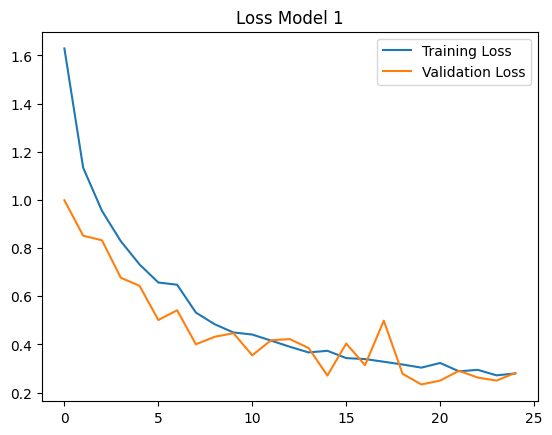

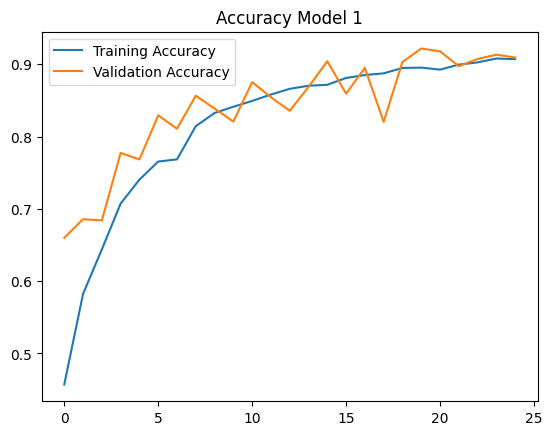

In [17]:
train_loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
train_acc1 = history1.history['accuracy']
val_acc1 = history1.history['val_accuracy']

# Plot Loss and Accuracy
plt.figure()
plt.plot(train_loss1, label='Training Loss')
plt.plot(val_loss1, label='Validation Loss')
plt.title('Loss Model 1')
plt.legend()
plt.show()

plt.figure()
plt.plot(train_acc1, label='Training Accuracy')
plt.plot(val_acc1, label='Validation Accuracy')
plt.title('Accuracy Model 1')
plt.legend()
plt.show()

### Confusion matrix
การประเมินผลโมเดล classification โดยแสดงการคาดการณ์ของโมเดลเมื่อเปรียบเทียบกับค่าจริงในรูปแบบตาราง ซึ่งช่วยให้เข้าใจถึงการทำงานของโมเดลได้ชัดเจนมากขึ้น

<Figure size 1200x1000 with 0 Axes>

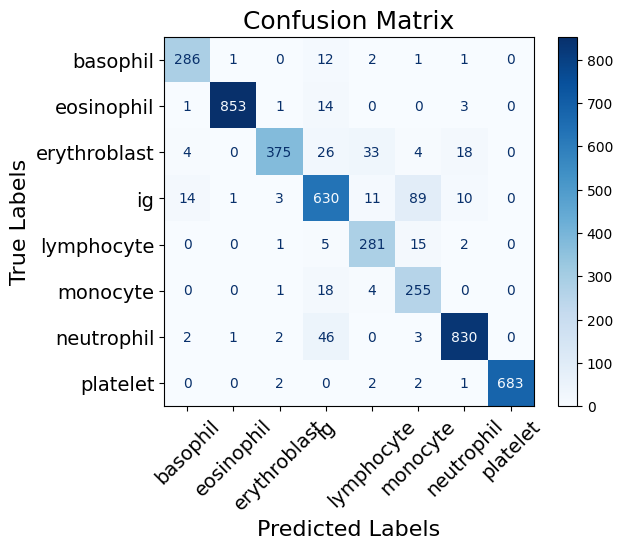

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Get all true labels and predictions from the validation dataset
true_labels = []
predicted_labels = []

for images, labels in val_dataset:
    predictions = model1.predict(images)
    predicted_indexes = np.argmax(predictions, axis=1)
    
    true_labels.extend(labels.numpy())  # Convert tensor to numpy array
    predicted_labels.extend(predicted_indexes)

# Create confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Set the figure size (adjust as needed)
plt.figure(figsize=(12, 10))  # Increase size if necessary

# Create the confusion matrix display with custom settings
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix with larger font size
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)  # Rotate xticks for readability

# Adjust font size for the tick labels
plt.xticks(fontsize=14)  # Change 14 to the desired font size
plt.yticks(fontsize=14)

# Adjust font size for labels and title
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)

# Show the plot
plt.show()

# 5. Model Improvement

### 5.1 การวิเคราะห์ข้อบกพร่องของโมเดล
- Accuracy ของ model1 นั้นออกมาเป็น 0.92 เป็นผลลัพธ์ที่น่าพอใจ แต่ทางกลุ่มคาดว่าสามารถทำให้ความแม่นยำสูงขึ้นกว่านี้ได้อีก โดยการเปลี่ยนค่า parameter
- คาดว่า Dropout layer 0.1 นั้นน้อยเกินไป อาจเกิดการ overfit เล็กน้อย
- จำนวน filter ของ neural network นั้นคาดว่ามีจำนวนน้อย
- data augmentation คาดว่า RandomZoom และ RandomContrast มีค่าน้อยเกินไป
- โมเดลทายเซลล์ immature granulocyte (ig) ผิดเป็น lymphocyte จำนวนมาก รองลงมาคือ ทายเซลล์ neutrophil ผิดเป็น erythroblast
### 5.2 การปรับปรุงโมเดล
- data augmentation นำ RandomRotation ออกและเพิ่ม RandomZoom เป็น 0.25 และ RandomContrast เป็น 0.3 เพื่อให้ข้อมูลมีความหลากหลายขึ้นกว่าเดิม
- เพิ่มจำนวน filter ของ layer
- ปรับปรุง Dropout layer ให้เป็น 0.4 และเพิ่มเป็น 2 layer เพื่อลดการ overfit ให้มากขึ้น
- กำหนด decay_steps = 10000 คือทุกๆ 10000 steps จะลดค่า learning rate ลง
- decay_rate = 0.9 คือ learning rate จะถูกลดลง 0.9 ทุกๆ 10000 steps

### train : test = 70 : 30

In [19]:
train_dataset2 = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.3,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Validation dataset 30% (test)
val_dataset2 = tf.keras.utils.image_dataset_from_directory(
    data_directory,
    validation_split=0.3,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 15166 files belonging to 8 classes.
Using 10617 files for training.
Found 15166 files belonging to 8 classes.
Using 4549 files for validation.


### data augmentation

In [20]:
#data augmentation
data_augmentation2 = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomZoom(0.25),
    keras.layers.RandomContrast(0.3),
])

### สร้างโมเดล Convolutional Neural Network (CNN)

In [21]:
model2 = tf.keras.Sequential([
    keras.Input(shape=(300, 300, 3)),
    data_augmentation2,  # Include the augmentation
    keras.layers.Rescaling(1./255),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(128, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(256, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(512, 3, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(num_classes)
])

### ตรวจสอบโมเดล Convolutional Neural Network (CNN)

In [22]:
# Check model structure
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 300, 300, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 300, 300, 3)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 298, 298, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 147, 147, 128)     73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 73, 73, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 256)      

### Visualization model2

<img src=".\model2_visualize.png" alt="model2_vis" style="width:60%;"/> ![model2_plot](.\model_plot2.png)

### กำหนด learning rate, decay steps, decay rate

In [23]:
# set learning rate
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.9, staircase=True)

### กำหนด earlystopping ถ้าโมเดลค่าไม่ดีขึ้นให้หยุดเทรนเอง

In [24]:
# Callbacks for early stopping
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True),
]

### ตั้งค่า parameter ที่สำคัญ

In [25]:
# compile
model2.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

### เทรนโมเดลทีได้รับการปรับปรุง

In [26]:
history2 = model2.fit(
    train_dataset2,
    validation_data=val_dataset2,
    epochs=epoch,
    callbacks=callbacks # add early stopping
)

Epoch 1/50
664/664 [==============================] - 66s 94ms/step - loss: 1.3093 - accuracy: 0.5050 - val_loss: 0.8474 - val_accuracy: 0.6898
Epoch 2/50
664/664 [==============================] - 61s 91ms/step - loss: 0.8426 - accuracy: 0.6949 - val_loss: 0.5652 - val_accuracy: 0.7804
Epoch 3/50
664/664 [==============================] - 61s 92ms/step - loss: 0.6037 - accuracy: 0.7811 - val_loss: 0.3996 - val_accuracy: 0.8591
Epoch 4/50
664/664 [==============================] - 61s 92ms/step - loss: 0.4953 - accuracy: 0.8307 - val_loss: 0.3409 - val_accuracy: 0.8868
Epoch 5/50
664/664 [==============================] - 61s 91ms/step - loss: 0.4162 - accuracy: 0.8571 - val_loss: 0.2031 - val_accuracy: 0.9332
Epoch 6/50
664/664 [==============================] - 61s 92ms/step - loss: 0.3774 - accuracy: 0.8699 - val_loss: 0.2086 - val_accuracy: 0.9248
Epoch 7/50
664/664 [==============================] - 61s 92ms/step - loss: 0.3218 - accuracy: 0.8894 - val_loss: 0.1961 - val_accuracy:

### เก็บโมเดลที่ได้รับการปรับปรุงใหม่ไว้ในไฟล์ชื่อ final_model2.h5

In [27]:
model2.save('final_model2_final.h5')

### สำหรับ import model2

In [ ]:
model2 = load_model('path_to_your_model/final_model2_final.h5')

### แสดงผล score ของโมเดลที่ได้รับการปรับปรุง

In [28]:
from sklearn.metrics import classification_report

# Get all true labels and predictions from the validation dataset
true_labels2 = []
predicted_labels2 = []

for images, labels in val_dataset2:
    predictions2 = model2.predict(images)
    predicted_indexes2 = np.argmax(predictions2, axis=1)
    
    true_labels2.extend(labels.numpy())  # Convert tensor to numpy array
    predicted_labels2.extend(predicted_indexes2)

# Generate a classification report including precision, recall, and F1-score
report2 = classification_report(true_labels2, predicted_labels2, target_names=class_names)
print(report2)

              precision    recall  f1-score   support

    basophil       0.97      0.98      0.98       303
  eosinophil       1.00      0.99      1.00       872
erythroblast       0.98      0.97      0.97       460
          ig       0.93      0.97      0.95       758
  lymphocyte       0.96      0.97      0.96       304
    monocyte       0.96      0.89      0.92       278
  neutrophil       0.99      0.98      0.98       884
    platelet       1.00      1.00      1.00       690

    accuracy                           0.98      4549
   macro avg       0.97      0.97      0.97      4549
weighted avg       0.98      0.98      0.98      4549



### ค่า accuracy ของโมเดลที่ได้รับการปรับปรุง

In [29]:
loss, accuracy = model2.evaluate(val_dataset2)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

285/285 [==============================] - 9s 30ms/step - loss: 0.0775 - accuracy: 0.9769
Test Loss: 0.0775, Test Accuracy: 0.9769


### กราฟ loss rate และ accuracy rate ของโมเดลทีไ่ด้รับการปรับปรุง

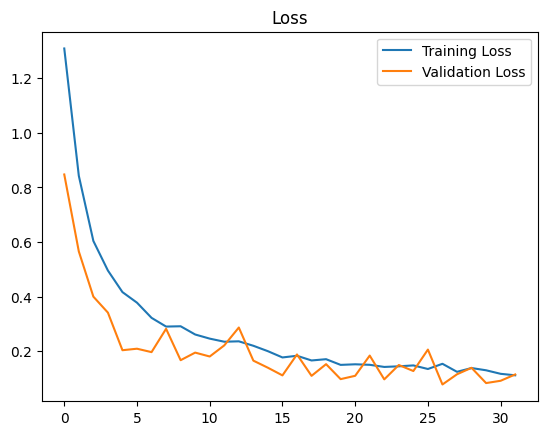

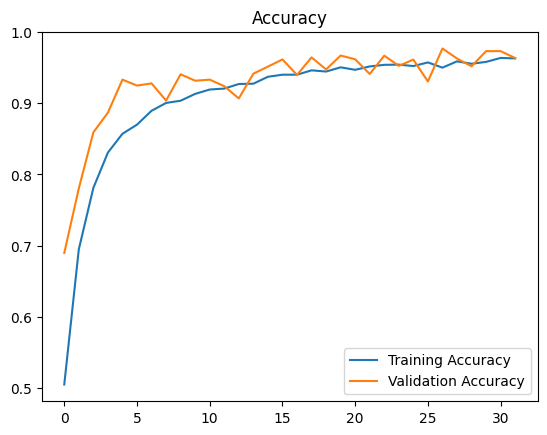

In [30]:
# Extract history data
train_loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
train_acc2 = history2.history['accuracy']
val_acc2 = history2.history['val_accuracy']

# Plot Loss and Accuracy
plt.figure()
plt.plot(train_loss2, label='Training Loss')
plt.plot(val_loss2, label='Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(train_acc2, label='Training Accuracy')
plt.plot(val_acc2, label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

### Confusion matrix ของโมเดลที่ได้รับการปรับปรุง

<Figure size 1200x1000 with 0 Axes>

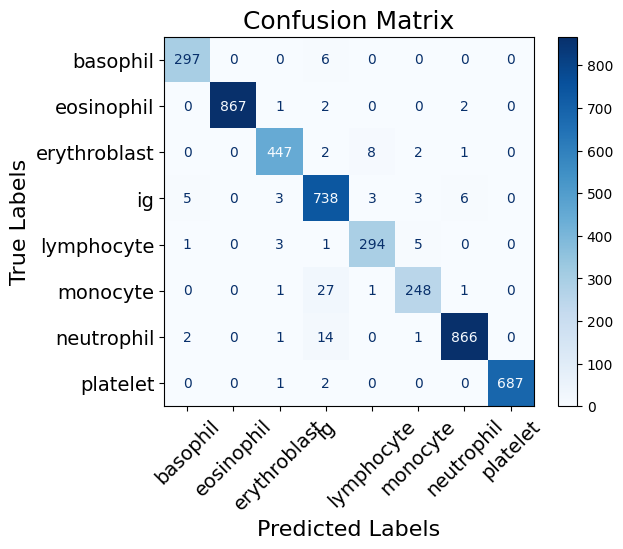

In [31]:
true_labels2 = []
predicted_labels2 = []

for images, labels in val_dataset2:
    predictions2 = model2.predict(images)
    predicted_indexes2 = np.argmax(predictions2, axis=1)
    
    true_labels2.extend(labels.numpy())  # Convert tensor to numpy array
    predicted_labels2.extend(predicted_indexes2)

# Create confusion matrix
cm2 = confusion_matrix(true_labels2, predicted_labels2)

# Set the figure size (adjust as needed)
plt.figure(figsize=(12, 10))  # Increase size if necessary

# Create the confusion matrix display with custom settings
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=class_names)

# Plot the confusion matrix with larger font size
disp2.plot(cmap=plt.cm.Blues, xticks_rotation=45)  # Rotate xticks for readability

# Adjust font size for the tick labels
plt.xticks(fontsize=14)  # Change 14 to the desired font size
plt.yticks(fontsize=14)

# Adjust font size for labels and title
plt.xlabel('Predicted Labels', fontsize=16)
plt.ylabel('True Labels', fontsize=16)
plt.title('Confusion Matrix', fontsize=18)

# Show the plot
plt.show()

### 5.3 การประเมินผลหลังการปรับปรุง
- Accuracy เพิ่มขึ้นจาก 0.92 เป็น 0.98
- Precision เพิ่มขึ้นจาก 0.93 เป็น 0.98
- Recall เพิ่มขึ้นจาก 0.92 เป็น 0.98
- F1-score เพิ่มขึ้นจาก 0.92 เป็น 0.98
- โดยรวมประสิทธิภาพของโมเดลเพิ่มขึ้นอย่างมาก precision ของเซลล์ monocyte ค่าเพิ่มขึ้นจาก 0.69 เป็น 0.96

# 6. ความแตกต่างระหว่าง Cuda core และ CPU ในการเทรนโมเดล

ทดสอบการเทรนโมเดลผ่าน GPU RTX3060 12gb ที่มี cuda core และ CPU Ryzen 5 5600x
- การเทรนผ่าน GPU ที่มี cuda core ใช้เวลาต่อ 1 epoch 1 นาที เร็วกว่าการเทรนผ่าน CPU ที่ใช้เวลาเทรนต่อ 1 epoch 10 นาที 
- แสดงให้เห็นว่า cuda core นั้นมีความจำเป็นในการเทรนโมเดล Deep learning มากเพราะลดระยะเวลาการเทรนโปรเจคนี้ได้ถึง 10 เท่า
- เวลาโดยรวม cuda core ใช้ประมาณ 30 นาที (model2 ที่ปรับปรุงแล้ว) CPU ใช้เวลา 6-7 ชั่วโมง